# The Sparks Foundation - Data Science and Business Analytics Internship
Name - Sarang Narayanrao Chandekar

Link - https://internship.thesparksfoundation.info/

Task No.1 - Prediction Using Supervised Learning (Level-Begineer)

**Problem statement:**

**1.Predict the precentage of a Student based on number of study hours.**

**2.What will be the predicted scoreif a student studies for 9.25hr/day.**

### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Import Filter Warinings
import warnings
warnings.filterwarnings('ignore')

### Importing the dataset

In [2]:
url="http://bit.ly/w-data"
data = pd.read_csv(url)

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [5]:
data.shape

(25, 2)

In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Checking for the null or NA values and duplicated values to know the quality of data**

In [7]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [8]:
data.nunique()

Hours     23
Scores    23
dtype: int64

In [9]:
data.duplicated().sum()

0

**We can say that quality of data is good and data is not biased as there are no null or duplicated values in the dataset**

Plotting the **Dataset: Hours Vs Score**

Text(0, 0.5, 'Score')

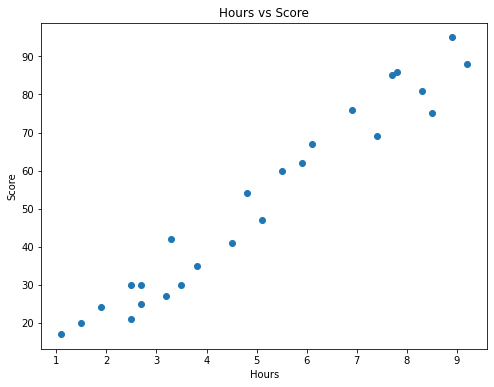

In [10]:
plt.figure(figsize=(8,6))

plt.scatter('Hours','Scores' , data= data)
plt.title ("Hours vs Score")
plt.xlabel ("Hours")
plt.ylabel("Score")

**Creating Model : Train,Test Split**

In [11]:
X = data.iloc[:,:-1].values
y = data.iloc[:,1].values

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) 


In [14]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression()

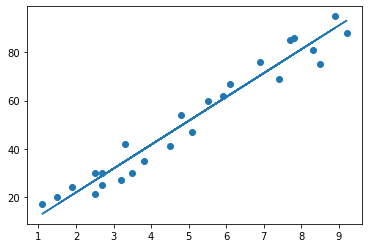

In [15]:
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

**Prediction and Evaluation**

In [16]:
y_pred = regressor.predict(X_test)

y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [17]:
regressor.score(X_train,y_train)
regressor.score(X_test,y_test)

0.9454906892105356

In [18]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [19]:
hours = 9.25
test_data = np.array([hours]).reshape(-1,1)
own_pred = regressor.predict(test_data)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


In [20]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975


By using Simple Linear Regression Method we can say that above result shows that Students who **studies for 9.25 hours score 93.691%**